# DESCRIPTION

Here, we are testing cardio vascular disease like hypertension,stroke, heart and kidney failure.

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

ap_hi is systolic blood pressure
<br>Cholestorol AND GLUSOCE :1 normal , 2 above normal , 3 well above normal
    <br>smoking 0 no 1 yes 

SYSTOLIC:When your heart beats, it pushes blood through your arteries to your body. During this force is exerted on your blood vessels. This is the systolic blood pressure.Usually, it is below 120. BP of 140 or higher means you have high blood pressure.This is the pressure your heart exerts when it is contracting and pumping oxygen rich blood into your vessels.When taking blood pressure reading,systolic is the one above diastolic.Normal is below a value of 140

DIASTOLIC:This is when your heart relaxes. Diastolic pressure is always lower than systolic.Normal is under a value of 60-90.Above 90 is high.Below 60, the person starts feeling dizzy, finds it difficult to walk most of the times because your heart is pumping more blood.Low diastolic pressure can be caused by meditations and age

BMI:Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater

PULSE:The number of times your heart beats per minute.Normal pulse range is 60 to 100 beats but it can go up to 130-150 if you are exercising because the body needs to pump in more oxygen . It can also be a range of conditions too.Adults can worry if it is above 120 at rest.This can mean a lot of sicknesses such as anaemia and so on.Lower than 60 is low and it refers to a condition called bradycardia.It could be  normal for athletes but could also mean serious medical ailments.

# DATA CLEANING

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

In [2]:
cardio=pd.read_csv("cardio_train.csv",delimiter=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardio.shape

(70000, 13)

In [4]:
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
cardio["age"]=cardio["age"]/365

In [6]:
cardio["age"]=cardio["age"].astype(int)

In [7]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
def gender(x):
    if x==1:
        return "women"
    else:
        return "men"

In [9]:
cardio["gender"]=cardio["gender"].apply(gender)

In [10]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,men,168,62.0,110,80,1,1,0,0,1,0
1,1,55,women,156,85.0,140,90,3,1,0,0,1,1
2,2,51,women,165,64.0,130,70,3,1,0,0,0,1
3,3,48,men,169,82.0,150,100,1,1,0,0,1,1
4,4,47,women,156,56.0,100,60,1,1,0,0,0,0


In [11]:
def cholesterol(x):
    if x==1:
        return "normal"
    elif x==2:
        return "above normal"
    else:
        return "extreme"

In [12]:
def gluc(x):
    if x==1:
        return "normal"
    elif x==2:
        return "above normal"
    else:
        return "extreme"

In [13]:
def smoke(x):
    if x==0:
        return "no"
    else:
        return "yes"

In [14]:
def alco(x):
    if x==1:
        return "yes"
    else :
        return "no"

In [15]:
def active(x):
    if x==1:
        return "yes"
    else:
        return "no"

In [16]:
cardio.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,men,168,62.0,110,80,1,1,0,0,1,0
1,1,55,women,156,85.0,140,90,3,1,0,0,1,1


In [17]:
cardio["gluc"]=cardio["gluc"].apply(gluc)
cardio["cholesterol"]=cardio["cholesterol"].apply(cholesterol)
cardio["smoke"]=cardio["smoke"].apply(smoke)
cardio["alco"]=cardio["alco"].apply(alco)
cardio["active"]=cardio["active"].apply(active)

In [18]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,men,168,62.0,110,80,normal,normal,no,no,yes,0
1,1,55,women,156,85.0,140,90,extreme,normal,no,no,yes,1
2,2,51,women,165,64.0,130,70,extreme,normal,no,no,no,1
3,3,48,men,169,82.0,150,100,normal,normal,no,no,yes,1
4,4,47,women,156,56.0,100,60,normal,normal,no,no,no,0


In [19]:
cardio.set_index("id",inplace=True)

In [20]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,men,168,62.0,110,80,normal,normal,no,no,yes,0
1,55,women,156,85.0,140,90,extreme,normal,no,no,yes,1
2,51,women,165,64.0,130,70,extreme,normal,no,no,no,1
3,48,men,169,82.0,150,100,normal,normal,no,no,yes,1
4,47,women,156,56.0,100,60,normal,normal,no,no,no,0


In [21]:
cardio.rename(columns={"ap_hi":"systolic","ap_lo":"diastolic"},inplace=True)

In [22]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,men,168,62.0,110,80,normal,normal,no,no,yes,0
1,55,women,156,85.0,140,90,extreme,normal,no,no,yes,1
2,51,women,165,64.0,130,70,extreme,normal,no,no,no,1
3,48,men,169,82.0,150,100,normal,normal,no,no,yes,1
4,47,women,156,56.0,100,60,normal,normal,no,no,no,0


In [23]:
cardio["pulse"]=cardio["systolic"]-cardio["diastolic"]

In [24]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse
id,,,,,,,,,,,,,
0,50,men,168,62.0,110,80,normal,normal,no,no,yes,0,30
1,55,women,156,85.0,140,90,extreme,normal,no,no,yes,1,50
2,51,women,165,64.0,130,70,extreme,normal,no,no,no,1,60
3,48,men,169,82.0,150,100,normal,normal,no,no,yes,1,50
4,47,women,156,56.0,100,60,normal,normal,no,no,no,0,40


Convert height in cm to m in other to calcu;ate body mass indeX

In [25]:
cardio["height"]=cardio["height"]/100

In [26]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse
id,,,,,,,,,,,,,
0,50,men,1.68,62.0,110,80,normal,normal,no,no,yes,0,30
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50
2,51,women,1.65,64.0,130,70,extreme,normal,no,no,no,1,60
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50
4,47,women,1.56,56.0,100,60,normal,normal,no,no,no,0,40


In [27]:
cardio["bmi"]=(cardio["weight"])/(cardio["height"]*cardio["height"])

In [28]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
0,50,men,1.68,62.0,110,80,normal,normal,no,no,yes,0,30,21.967120
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
2,51,women,1.65,64.0,130,70,extreme,normal,no,no,no,1,60,23.507805
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
4,47,women,1.56,56.0,100,60,normal,normal,no,no,no,0,40,23.011177


##### WORKING ON AGE

In [29]:
cardio.age.describe()

count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

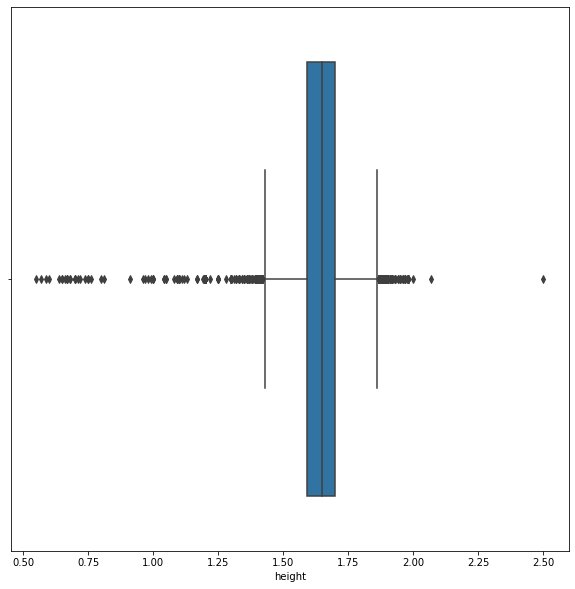

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(cardio["height"])

In [31]:
cardio=cardio[(cardio["height"]>1.5)&(cardio["height"]<2.0)]

In [32]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
0,50,men,1.68,62.0,110,80,normal,normal,no,no,yes,0,30,21.967120
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
2,51,women,1.65,64.0,130,70,extreme,normal,no,no,no,1,60,23.507805
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
4,47,women,1.56,56.0,100,60,normal,normal,no,no,no,0,40,23.011177


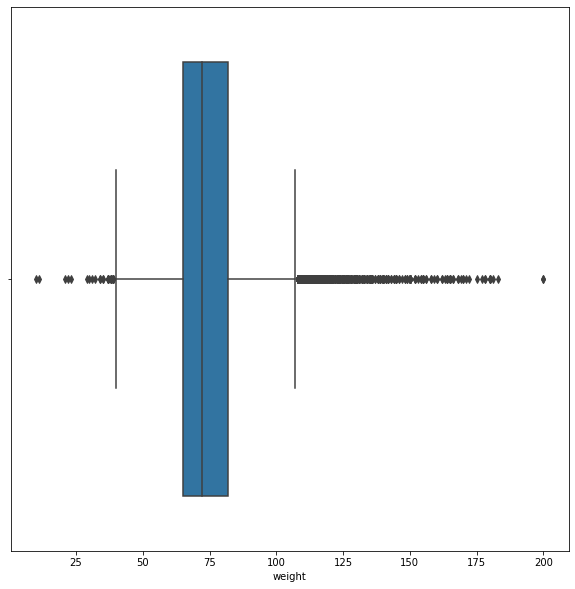

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(cardio["weight"])

In [34]:
cardio=cardio[(cardio["weight"]>65)&(cardio["weight"]<100)]

In [35]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588


In [36]:
cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
systolic       0
diastolic      0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
pulse          0
bmi            0
dtype: int64

In [37]:
cardio.shape

(44181, 14)

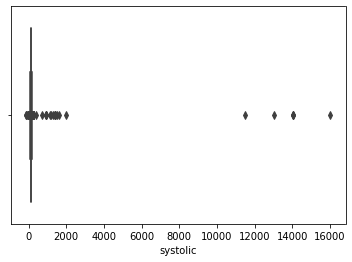

In [38]:
sns.boxplot(cardio["systolic"])

In [39]:
cardio=cardio[(cardio["systolic"]>50)&(cardio["systolic"]<170)]

In [40]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588


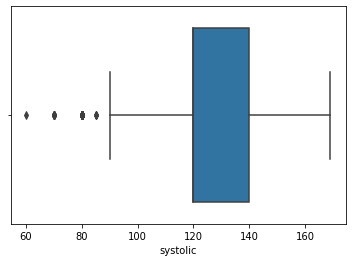

In [41]:
%matplotlib inline
sns.boxplot(cardio["systolic"])

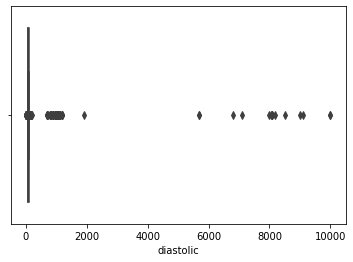

In [42]:
%matplotlib inline
sns.boxplot(cardio["diastolic"])

In [43]:
cardio.shape

(42901, 14)

In [44]:
cardio["cardio"].value_counts()

1    22215
0    20686
Name: cardio, dtype: int64

In [45]:
cardio=cardio[(cardio["diastolic"]>55)&(cardio["diastolic"]<105)]

In [46]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588


In [47]:
cardio.shape

(42079, 14)

In [48]:
cardio

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi
id,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,53,women,1.72,70.0,130,90,normal,normal,no,no,yes,1,40,23.661439
99992,57,women,1.65,80.0,150,80,normal,normal,no,no,yes,1,70,29.384757
99993,52,men,1.68,76.0,120,80,normal,normal,yes,no,yes,0,40,26.927438


BMI:Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater

In [49]:
def weight_check(value):
    if value <18.5:
        return "underweight"
    elif (value>=18.5)&(value<25):
        return "normal weight"
    elif (value>=25)&(value<30):
        return "overweight"
    else:
        return "obese"

In [50]:
cardio["weight_check"]=cardio["bmi"].apply(weight_check)

In [51]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [52]:
cardio["weight_check"].value_counts()

overweight       20780
obese            12586
normal weight     8708
underweight          5
Name: weight_check, dtype: int64

In [53]:
cardio[["weight"]].describe()

,weight
count,42079.000000
mean,77.832585
std,8.495582
min,65.300000
25%,70.000000
50%,76.000000
75%,84.000000
max,99.900000


In [54]:
cardio[["bmi"]].describe()

,bmi
count,42079.000000
mean,28.313569
std,3.754547
min,17.345169
25%,25.402816
50%,27.681661
75%,30.730609
max,42.849723


In [55]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [56]:
cardio[["pulse"]].describe()

,pulse
count,42079.000000
mean,45.058961
std,10.277037
min,-30.000000
25%,40.000000
50%,40.000000
75%,50.000000
max,100.000000


In [57]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [58]:
cardio.shape

(42079, 15)

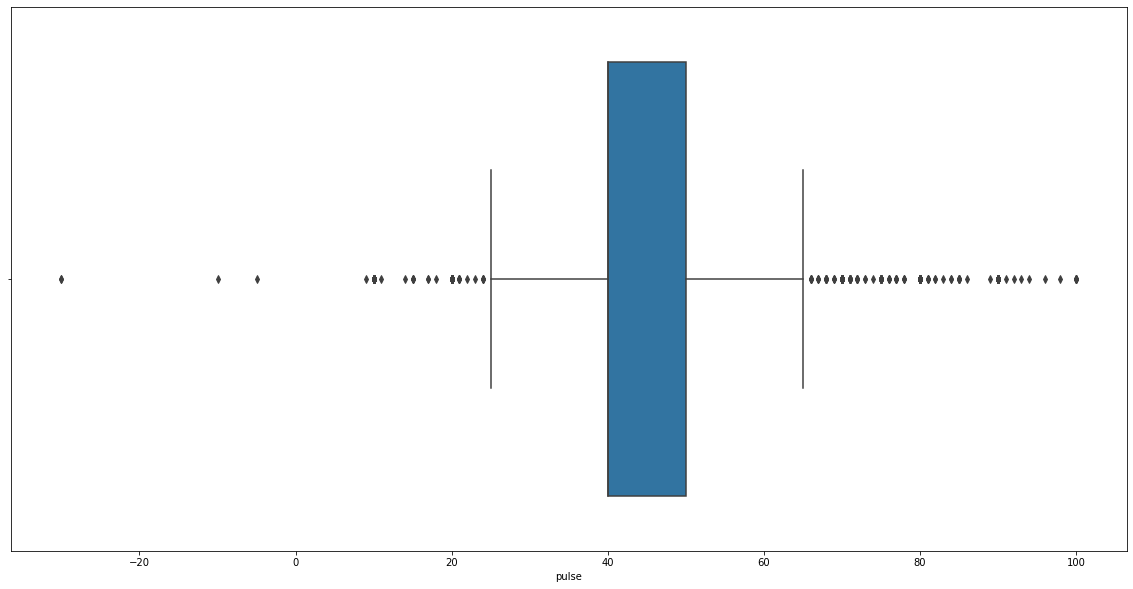

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(cardio["pulse"])

In [60]:
cardio=cardio[cardio["pulse"]>30]

## EXPLORATORY DATA ANALYSIS

In [61]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [62]:
cardio.shape

(38406, 15)

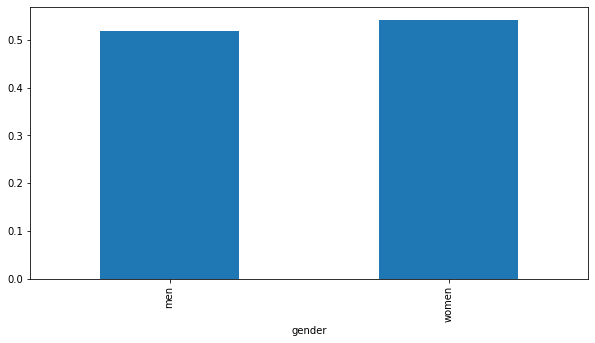

In [63]:
plt.figure(figsize=(10,5))
cardio.groupby("gender")["cardio"].mean().plot(kind="bar")

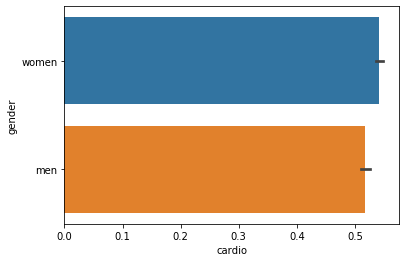

In [64]:
sns.barplot(cardio["cardio"],cardio["gender"])

In [65]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


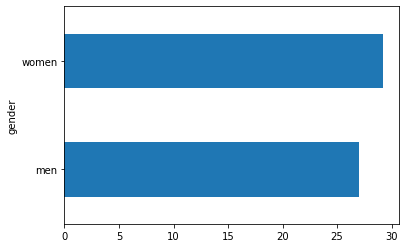

In [66]:
cardio.groupby('gender')["bmi"].mean().plot(kind="barh")

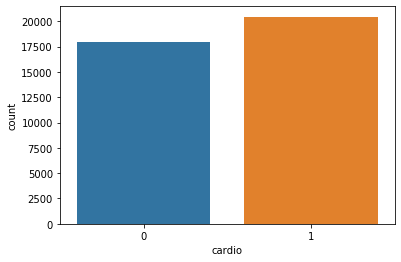

In [67]:
sns.countplot(cardio["cardio"])

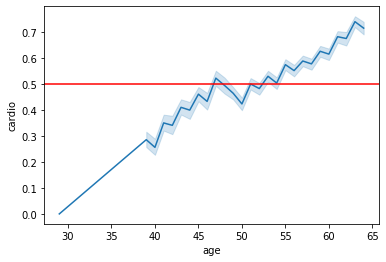

In [68]:
sns.lineplot(cardio["age"],cardio["cardio"])
plt.axhline(0.5,c="red")

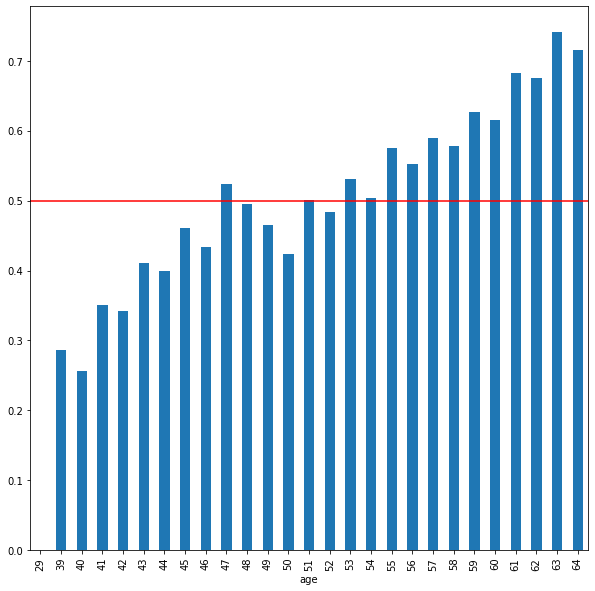

In [69]:
plt.figure(figsize=(10,10))
cardio.groupby("age")["cardio"].mean().plot(kind="bar")
plt.axhline(0.5,c="red")

<b><i>We can deduce from this plot that The higher the age, the more likely are people to have cardio vasular diseases.Ages greater than 53 are more likely to have cardiovascular problems than ages younger than 53

In [70]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


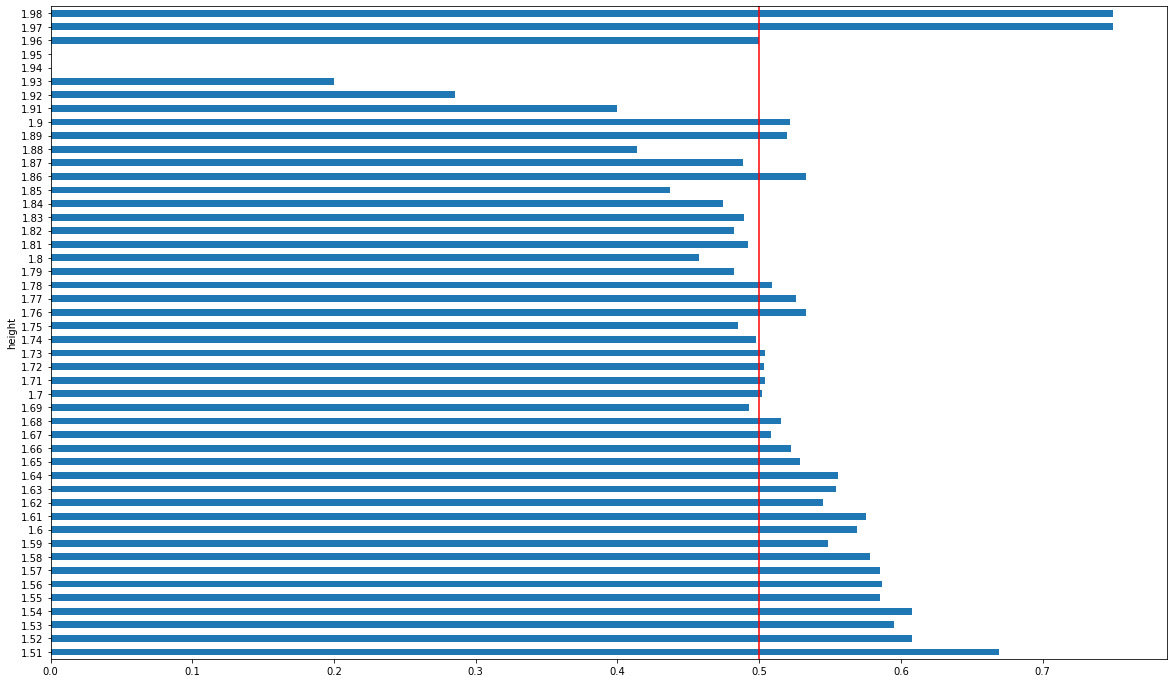

In [71]:
plt.figure(figsize=(20,12))
cardio.groupby("height")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

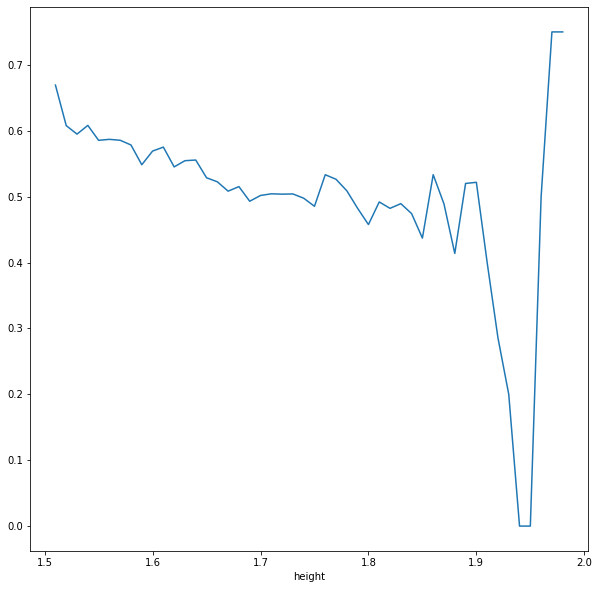

In [72]:
plt.figure(figsize=(10,10))
cardio.groupby("height")["cardio"].mean().plot(kind="line")

In [73]:
cardio["weight_check"].value_counts()

overweight       18881
obese            11555
normal weight     7965
underweight          5
Name: weight_check, dtype: int64

<b><i>'WE CAN SAY THAT EXTREMELY SHORT PEOPLE AND EXTREMELY TALL PEOPLE ARE LIKELY TO HAVE CARDIO VASCULAR DISEASES AND MOSTLY, AS HEIGHT INCREASES, THE PROBABILITY OF HAVING CARDIO VASCULAR DISEASE DECREASES.SHORTER PEOPLE ARE OF LARGER RISK OF CARDIO VASCULAR DISEASES<BR>AND ACCORDING TO THE RESEARCH FROM LECISTER UNIVERSITY, FOR EVERY RISE IN HEIGHT OF 2.5 INCHES , CARDIO VASCULAR DISEASE LIKELIHOOD FALLS BY 13.5%.AND THIS CAN BE CONFIRMED BY OUR DATA AND PLOT.'

In [74]:
cardio.corr()

,age,height,weight,systolic,diastolic,cardio,pulse,bmi
age,1.000000,-0.108986,0.033045,0.176156,0.127629,0.210242,0.141189,0.099812
height,-0.108986,1.000000,0.119978,-0.072808,-0.044592,-0.067144,-0.065658,-0.560956
weight,0.033045,0.119978,1.000000,0.175983,0.156401,0.118574,0.115191,0.750725
systolic,0.176156,-0.072808,0.175983,1.000000,0.733332,0.418722,0.793618,0.193353
diastolic,0.127629,-0.044592,0.156401,0.733332,1.000000,0.324650,0.168341,0.158149
cardio,0.210242,-0.067144,0.118574,0.418722,0.324650,1.000000,0.316567,0.142215
pulse,0.141189,-0.065658,0.115191,0.793618,0.168341,0.316567,1.000000,0.138810
bmi,0.099812,-0.560956,0.750725,0.193353,0.158149,0.142215,0.138810,1.000000


In [75]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


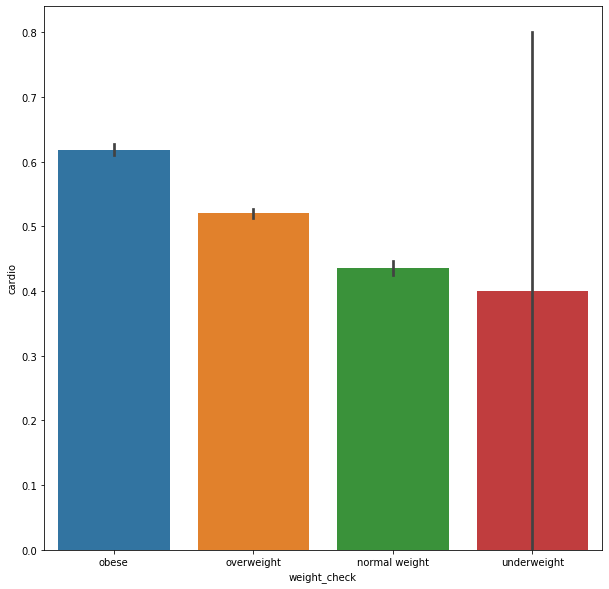

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(cardio["weight_check"],cardio["cardio"])

<b><i>'WE CAN SEE THAT OUR INTUITION CAN BE PROVEN BY OUR DATA. NORMAL WEIGHTED PEOPLE ARE MORE LIKELY TO NOT HAVE CARDIO VASCULAR DISEASES THAN OBESE AND OVERWEIGHT PEOPLE'

In [77]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


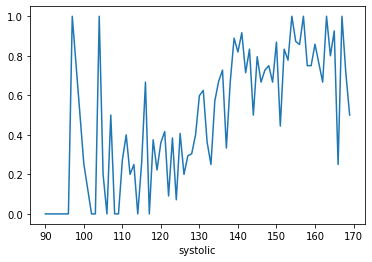

In [78]:
cardio.groupby("systolic")["cardio"].mean().plot(kind="line")

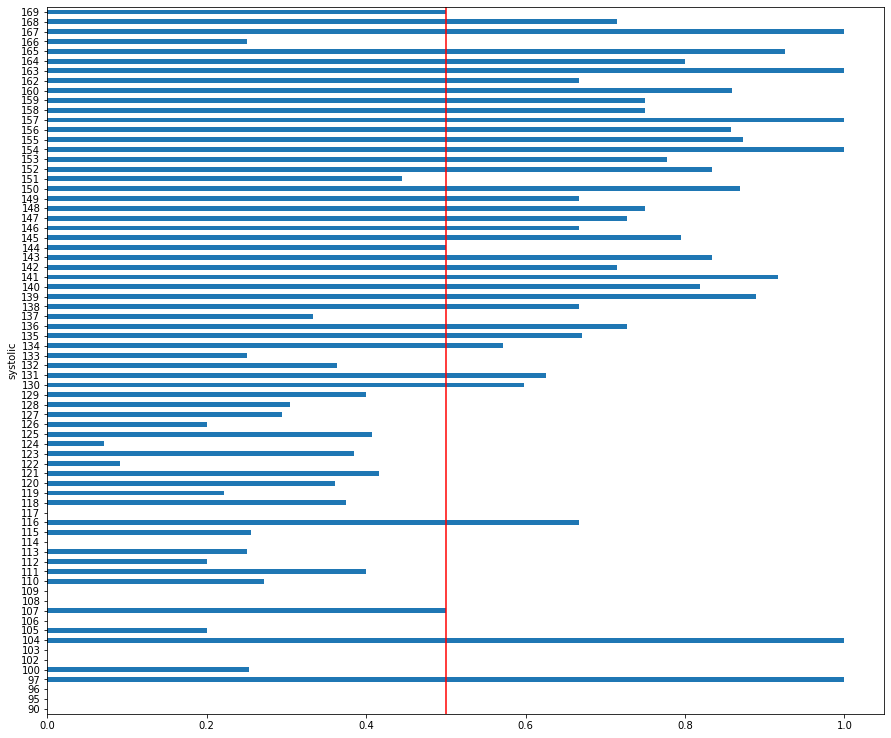

In [79]:
plt.figure(figsize=(15,13))
cardio.groupby("systolic")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,color="red")

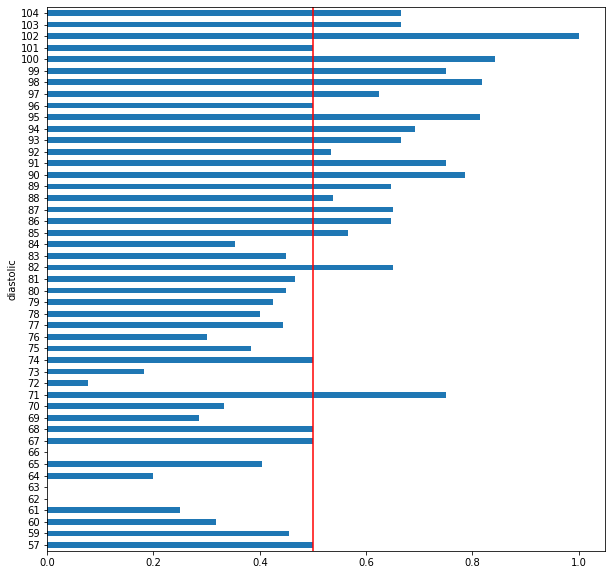

In [80]:
plt.figure(figsize=(10,10))
cardio.groupby("diastolic")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="r")

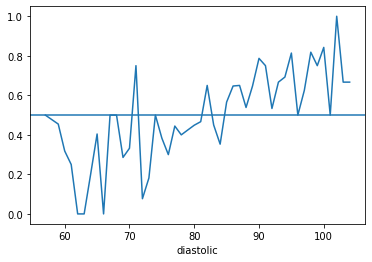

In [81]:
cardio.groupby("diastolic")["cardio"].mean().plot(kind="line")
plt.axhline(0.5)

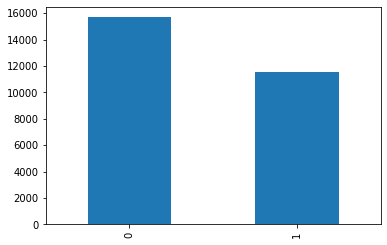

In [82]:
cardio[(cardio["diastolic"]>59)&(cardio["diastolic"]<90)]["cardio"].value_counts().plot(kind="bar")

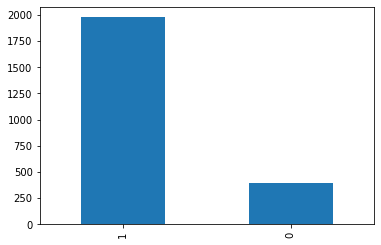

In [83]:
cardio[(cardio["diastolic"]>90)]["cardio"].value_counts().plot(kind="bar")

<b><i>AT NORMAL DIASTOLIC AND SYSTOLIC RATE, MOST OF THE PATIENTS DID NOT HAVE CARDIOVASCULAR DISEASES AND AT EXTREME VALUES (>90) MOST PATIENTS HAD CARDIO VASCULAR DISEASES

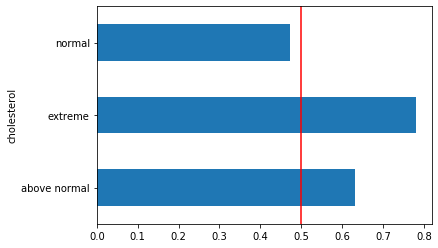

In [84]:
cardio.groupby("cholesterol")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

<b><i>THIS CONFIRMED OUR INTUITION THAT MOST PEOPLE ABOVE NORMAL CHOLESTEROL ARE MORE LIKELY TO HAVE CARDIO VASCULARE DISEASES THAN NORMAL PEOPLE

In [85]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


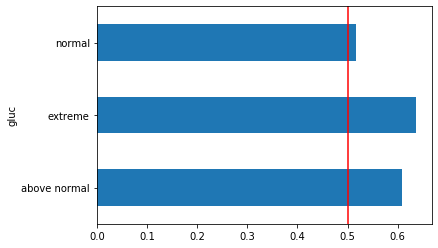

In [86]:
cardio.groupby("gluc")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

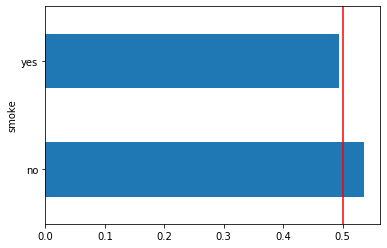

In [87]:
cardio.groupby("smoke")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

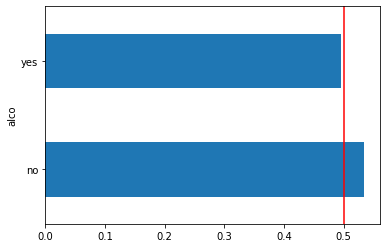

In [88]:
cardio.groupby("alco")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

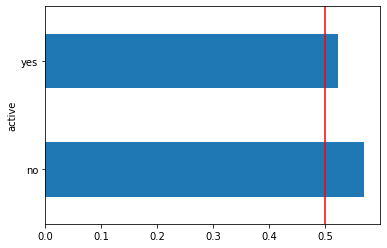

In [89]:
cardio.groupby("active")["cardio"].mean().plot(kind="barh")
plt.axvline(0.5,c="red")

<b><i>QUESTION:HOW COME MOST PEOPLE THAT DO NOT SMOKE OR DRINK HAVE CARDIO VASCULAR DISEASE

In [90]:
cardio["smoke"].value_counts()

no     34606
yes     3800
Name: smoke, dtype: int64

In [91]:
cardio["alco"].value_counts()

no     36163
yes     2243
Name: alco, dtype: int64

<b><i>ANSWER:THE DATASET IS HIGHLY IMBALANCED FOR SMOKERS AND ALCOHOL TAKERS

In [92]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [93]:
corr=cardio.corr()

In [94]:
corr[corr>0.7]

,age,height,weight,systolic,diastolic,cardio,pulse,bmi
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.750725
systolic,NaN,NaN,NaN,1.000000,0.733332,NaN,0.793618,NaN
diastolic,NaN,NaN,NaN,0.733332,1.000000,NaN,NaN,NaN
cardio,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
pulse,NaN,NaN,NaN,0.793618,NaN,NaN,1.000000,NaN
bmi,NaN,NaN,0.750725,NaN,NaN,NaN,NaN,1.000000


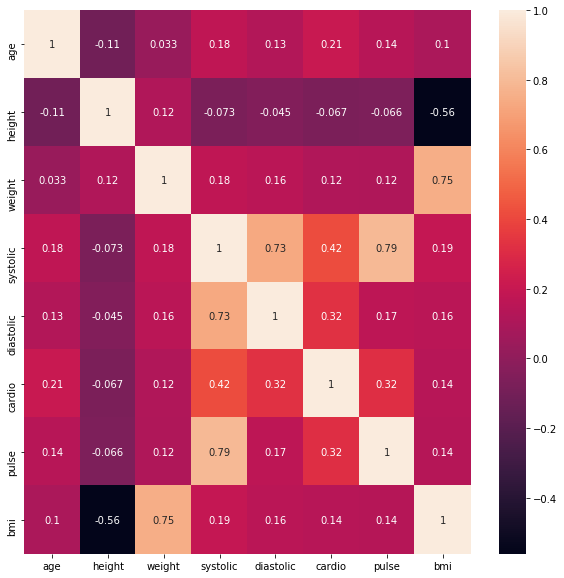

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# DATA MODELLING

In [96]:
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [97]:
cardio.head(1)

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese


In [98]:
X_cat=cardio[["gender","cholesterol","gluc","smoke","alco","active"]]
X_cat.head()

,gender,cholesterol,gluc,smoke,alco,active
id,,,,,,
1,women,extreme,normal,no,no,yes
3,men,normal,normal,no,no,yes
8,women,above normal,above normal,no,no,no
9,women,extreme,normal,no,no,yes
12,men,extreme,extreme,no,no,yes


In [99]:
X_num=cardio[["age","systolic","diastolic","pulse","bmi"]]

In [100]:
X_num.head()

,age,systolic,diastolic,pulse,bmi
id,,,,,
1,55,140,90,50,34.927679
3,48,150,100,50,28.710479
8,60,120,80,40,29.384676
9,60,130,80,50,37.729725
12,61,130,90,40,29.983588


In [175]:
ohe=OneHotEncoder(sparse=False).fit(X_cat)
ohe1=ohe.transform(X_cat)

In [102]:
scale=StandardScaler()
#scale.fit_transform()
X_num_scale=scale.fit_transform(X_num.values)

In [176]:
ohe1

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [104]:
X_num_scale

array([[ 0.27215259,  0.87247064,  1.00779188,  0.36310235,  1.75527   ],
       [-0.77996047,  1.62266166,  2.22321831,  0.36310235,  0.10284732],
       [ 1.02366191, -0.62791141, -0.20763456, -0.72458192,  0.282037  ],
       ...,
       [-0.17875301, -0.62791141, -0.20763456, -0.72458192, -0.37105389],
       [ 1.17396378,  0.49737513, -0.20763456,  0.90694448, -0.32538891],
       [ 0.42245445, -0.62791141, -0.20763456, -0.72458192, -0.90632457]])

In [105]:
X_num_scale.shape

(38406, 5)

In [177]:
ohe1.shape

(38406, 14)

In [107]:
X_new=pd.concat([pd.DataFrame(X_num_scale),pd.DataFrame(ohe)],axis="columns")

In [108]:
cardio.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse,bmi,weight_check
id,,,,,,,,,,,,,,,
1,55,women,1.56,85.0,140,90,extreme,normal,no,no,yes,1,50,34.927679,obese
3,48,men,1.69,82.0,150,100,normal,normal,no,no,yes,1,50,28.710479,overweight
8,60,women,1.51,67.0,120,80,above normal,above normal,no,no,no,0,40,29.384676,overweight
9,60,women,1.57,93.0,130,80,extreme,normal,no,no,yes,0,50,37.729725,obese
12,61,men,1.78,95.0,130,90,extreme,extreme,no,no,yes,1,40,29.983588,overweight


In [109]:
X_new.head()

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.272153,0.872471,1.007792,0.363102,1.755270,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.779960,1.622662,2.223218,0.363102,0.102847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.023662,-0.627911,-0.207635,-0.724582,0.282037,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.023662,0.122280,-0.207635,0.363102,2.500005,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.173964,0.122280,1.007792,-0.724582,0.441217,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [110]:
X=X_new.values

In [111]:
X

array([[ 0.27215259,  0.87247064,  1.00779188, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77996047,  1.62266166,  2.22321831, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.02366191, -0.62791141, -0.20763456, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.17875301, -0.62791141, -0.20763456, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.17396378,  0.49737513, -0.20763456, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42245445, -0.62791141, -0.20763456, ...,  0.        ,
         0.        ,  1.        ]])

In [112]:
y=cardio["cardio"].values

In [113]:
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [114]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

In [115]:
pca=PCA(2)
Xtrain_pca=pca.fit_transform(Xtrain)
Xtest_pca=pca.transform(Xtest)

In [116]:
pca.explained_variance_ratio_

array([0.34067829, 0.15503566])

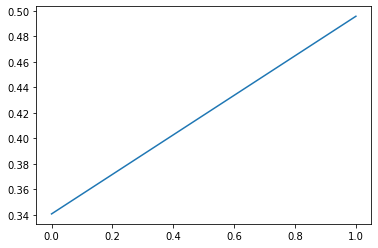

In [117]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

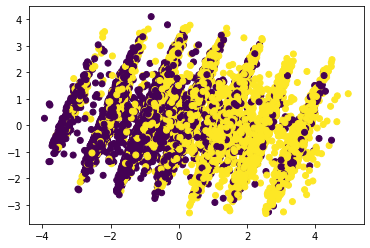

In [118]:
plt.scatter(Xtrain_pca[:,0],Xtrain_pca[:,1],c=ytrain)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
models={"svc":SVC(),
       "lr":LogisticRegression(),
       "dt":DecisionTreeClassifier(),
       "rfc":RandomForestClassifier(),
       "gbc":GradientBoostingClassifier(),
       "knc":KNeighborsClassifier()}

In [121]:
for name,param in models.items():
    param.fit(Xtrain,ytrain)
    pred=param.predict(Xtest)
    print(f"The training accuracy for {name} is {param.score(Xtrain,ytrain)}")
    print(f"The accuracy for {name} is {param.score(Xtest,ytest)}")

The training accuracy for svc is 0.7231981669212609
The accuracy for svc is 0.7232868152468236
The training accuracy for lr is 0.7166018608526593
The accuracy for lr is 0.7206831910018746
The training accuracy for dt is 0.9825371476183863
The accuracy for dt is 0.6319516767340138
The training accuracy for rfc is 0.9825024302180253
The accuracy for rfc is 0.6705894605290564
The training accuracy for gbc is 0.7256978197472573
The accuracy for gbc is 0.7252655696729848
The training accuracy for knc is 0.7762463546729621
The accuracy for knc is 0.6811081024786503


In [122]:
#params={"n_estimators":[1,10,20,50,100],"max_depth":[1,2,3,4,5]}
#grid=GridSearchCV(GradientBoostingClassifier(),params,cv=5)
#grid.fit(Xtrain,ytrain)
#print(f"Best params:{grid.best_params_}")
#print(f"Best estimator:{grid.best_estimator_}")
#print(f"Best score:{grid.best_score_}")

In [123]:
from xgboost import XGBClassifier

In [178]:
xgb=XGBClassifier().fit(Xtrain,ytrain)
ypred=xgb.predict(Xtest)
accuracy_score(ytest,ypred)

0.7260987294313684

In [125]:
xgb.score(Xtrain,ytrain)

0.7254547979447299

# MODEL EVALUATION

Here, we want to eliminate False Negatives(predicting the person is healthy when he has cardio vascular diseases)

In [126]:
mat=confusion_matrix(ytest,ypred)

In [127]:
mat

array([[3304, 1213],
       [1417, 3668]], dtype=int64)

Text(33.0, 0.5, 'Predicted value')

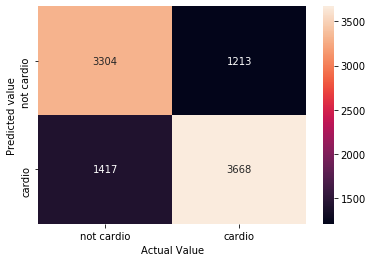

In [128]:
sns.heatmap(np.array(mat),annot=True,fmt="d",xticklabels=["not cardio","cardio"],yticklabels=["not cardio","cardio"])
plt.xlabel("Actual Value")
plt.ylabel("Predicted value")

TOP RIGHT:FALSE NEGATIVE<br>BOTTOM LEFT:FALSE POSITIVE

In [185]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      4517
           1       0.75      0.72      0.74      5085

    accuracy                           0.73      9602
   macro avg       0.73      0.73      0.73      9602
weighted avg       0.73      0.73      0.73      9602



In [130]:
from sklearn.preprocessing import binarize

In [131]:
xgb.predict_proba(Xtest)[:,1]

array([0.85655236, 0.38779444, 0.30219206, ..., 0.86069506, 0.35494518,
       0.88424903], dtype=float32)

In [132]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(ytest, xgb.predict_proba(Xtest)[:,1])

Text(0, 0.5, 'Recall')

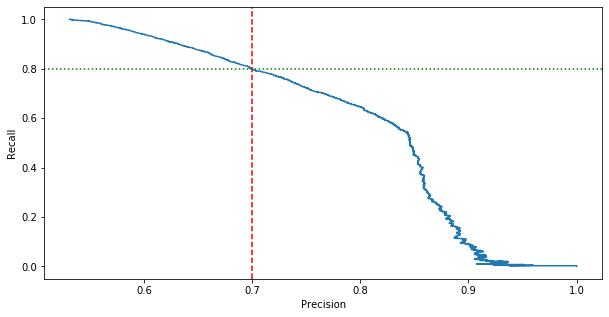

In [133]:
plt.figure(figsize=(10,5))
plt.plot(precision,recall)
plt.axvline(0.7,c="r",ls="--")
plt.axhline(0.8,c="g",ls=":")
plt.xlabel("Precision")
plt.ylabel("Recall")

# TRYING DIFFERENT THRESHOLD VALUES

In [134]:
thresholds=np.round(np.linspace(0,1,10),1)
xgb=XGBClassifier().fit(Xtrain,ytrain)
for i in thresholds:
    ypred_proba=(xgb.predict_proba(Xtest)>=i)[:,1]
    print(f"The accuracy score for thresold {i} is {accuracy_score(ytest,ypred_proba)}")
    print(f"The classification report for {i} is \n :{classification_report(ytest,ypred_proba)}\n")

The accuracy score for thresold 0.0 is 0.5295771714226203
The classification report for 0.0 is 
 :              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4517
           1       0.53      1.00      0.69      5085

    accuracy                           0.53      9602
   macro avg       0.26      0.50      0.35      9602
weighted avg       0.28      0.53      0.37      9602


The accuracy score for thresold 0.1 is 0.5364507394292856
The classification report for 0.1 is 
 :              precision    recall  f1-score   support

           0       0.95      0.02      0.03      4517
           1       0.53      1.00      0.70      5085

    accuracy                           0.54      9602
   macro avg       0.74      0.51      0.36      9602
weighted avg       0.73      0.54      0.38      9602


The accuracy score for thresold 0.2 is 0.5820662362007915
The classification report for 0.2 is 
 :              precision    recall  f1-score   supp

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report for 0.4 is 
 :              precision    recall  f1-score   support

           0       0.73      0.61      0.67      4517
           1       0.70      0.80      0.75      5085

    accuracy                           0.71      9602
   macro avg       0.72      0.71      0.71      9602
weighted avg       0.71      0.71      0.71      9602


The accuracy score for thresold 0.6 is 0.7227660903978338
The classification report for 0.6 is 
 :              precision    recall  f1-score   support

           0       0.66      0.83      0.74      4517
           1       0.81      0.62      0.70      5085

    accuracy                           0.72      9602
   macro avg       0.74      0.73      0.72      9602
weighted avg       0.74      0.72      0.72      9602


The accuracy score for thresold 0.7 is 0.7066236200791501
The classification report for 0.7 is 
 :              precision    recall  f1-score   support

           0       0.64      0.88      0.74      4517

THe most reasonable is when the threshold is 0.4...Our model was able to capture 80% of all people with cardio vascular diseases

### HOW IT WORKS

In [135]:
rrr=[[55,140,90,50,34.927579]]
rrr2=scale.transform(rrr)

In [136]:
rrr2

array([[0.27215259, 0.87247064, 1.00779188, 0.36310235, 1.75524338]])

In [184]:
ohe1[0]

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

In [186]:
sec=np.array([[0,1,0,1,0,0,0,1,1,0,1,0,0,1]])

In [138]:
rrrdf=pd.DataFrame(rrr2)
rrrdf

,0,1,2,3,4
0,0.272153,0.872471,1.007792,0.363102,1.755243


In [139]:
secdf=pd.DataFrame(sec)
secdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,0,1,0,0,0,1,1,0,1,0,0,1


In [140]:
ddd=pd.concat([rrrdf,secdf],axis="columns")

In [141]:
ddd

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.272153,0.872471,1.007792,0.363102,1.755243,0,1,0,1,0,0,0,1,1,0,1,0,0,1


In [142]:
np.hstack([rrr2,sec])

array([[0.27215259, 0.87247064, 1.00779188, 0.36310235, 1.75524338,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ]])

In [143]:
ddd.values

array([[0.27215259, 0.87247064, 1.00779188, 0.36310235, 1.75524338,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ]])

In [144]:
xgb.predict(ddd.values)

array([1], dtype=int64)

In [145]:
aaa=xgb.predict(Xtest)

In [146]:
print(classification_report(ytest,aaa))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      4517
           1       0.75      0.72      0.74      5085

    accuracy                           0.73      9602
   macro avg       0.73      0.73      0.73      9602
weighted avg       0.73      0.73      0.73      9602



In [147]:
yprob=xgb.predict_proba(Xtest)[:,1]
yprob

array([0.85655236, 0.38779444, 0.30219206, ..., 0.86069506, 0.35494518,
       0.88424903], dtype=float32)

In [148]:
yprob=xgb.predict_proba(Xtest)

In [149]:
y_pred_class=binarize(yprob,0.4)[:,1]

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Making the threshold 0.4

In [150]:
y_pred_class

array([1., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [151]:
print(classification_report(ytest,y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67      4517
           1       0.70      0.80      0.75      5085

    accuracy                           0.71      9602
   macro avg       0.72      0.71      0.71      9602
weighted avg       0.71      0.71      0.71      9602



In [152]:
xgb.predict_proba(Xtest)[6]

array([0.5100017 , 0.48999828], dtype=float32)

In [153]:
xgb.predict(Xtest)[6]

0

In [154]:
xgb.predict_proba(ddd.values)>0.4

array([[False,  True]])

In [155]:
def proba_func(x):
    if xgb.predict_proba(x)[0][1]>0.4:
        return np.array([1])
    else:
        return np.array([0])

In [156]:
proba_func(ddd.values)

array([1])

In [157]:
Xtest[6]

array([ 0.27215259, -0.62791141, -0.20763456, -0.72458192,  1.52174062,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ])

In [158]:
xgb.predict(ddd.values)

array([1], dtype=int64)

In [159]:
proba_func([ 0.27215259, -0.62791141, -0.20763456, -0.72458192,  1.52174062,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ])

array([1])

In [160]:
ytest[6]

1

### CONCLUSION

In [265]:
pickle.dump(xgb,open("model.pkl","wb"))


In [266]:
model=pickle.load(open("model.pkl","rb"))


In [269]:
pickle.dump(scale,open("scale.pkl","wb"))

In [270]:
scalerr=pickle.load(open("scale.pkl","rb"))